In [1]:
import lyricsgenius as lg
from datetime import datetime
from os.path import exists
import json

In [2]:
genius = lg.Genius("iSkmG97rEaGxRWsxdKbLNIb2jlq5jpXRoIwhkDqkTggE6nTQD40K96D13AvsxdYQ",
                    skip_non_songs=True, remove_section_headers=True)

In [3]:
caetano_veloso_albums = [
    "Domingo",
    "Tropicalia ou Panis et Circencis",
    "Caetano Veloso (1968)",
    "Caetano Veloso (1969)",
    "Caetano Veloso (1971)",
    "Transa",
    "Araça Azul",
    "Joia",
    "Qualquer Coisa",
    "Bicho",
    "Muito - Dentro da Estrela Azulada",
    "Cinema Transcendental",
    "Outras Palavras",
    "Cores, Nomes",
    "Uns",
    "Velô",
    "Caetano",
    "Estrangeiro",
    "Circuladô",
    "Tropicália 2",
    "Livro",
    "Noites do Norte",
    "Eu Não Peço Desculpa",
    "Cê",
    "Zii e Zie",
    "Abraçaço",
    "Meu Coco"
]

caetano_veloso_albums = [album_desc + " Caetano Veloso" 
                         if album_desc not in [
                             "Tropicalia ou Panis et Circencis",
                             "Tropicália 2",
                             "Eu Não Peço Desculpa"
                         ] else album_desc for album_desc in caetano_veloso_albums
                        ]

songs_to_remove = [
    "Candeias",
    "Minha Senhora",
    "Maria Joana",
    "Zabelê",
    "Miserere Nóbis",
    "Coração Materno",
    "Parque Industrial",
    "Geleia Geral",
    "Três Caravelas (Las Tres Carabelas)",
    "Hino ao Senhor do Bonfim",
    "Soy Loco Por Ti, América",
    "The Empty Boat",
    "Lost in the Paradise",
    "Carolina",
    "Cambalache",
    "Chuvas de Verão",
    "Alfômega",
    "A Little More Blue",
    "London, London",
    "Maria Bethânia",
    "If You Hold a Stone",
    "Shoot Me Dead",
    "In the Hot Sun of a Christmas Day",
    "Asa Branca",
    "You Don’t Know Me",
    "Nine Out of Ten",
    "It’s A Long Way",
    "Mora na Filosofia",
    "Neolithic Man",
    "Nostalgia",
    "Viola, Meu Bem",
    "Tu Me Acostumbraste",
    "Help",
    "Na Asa do Vento",
    "Samba e Amor",
    "Madrugada e Amor",
    "Jorge de Capadócia",
    "Eleanor Rigby",
    "For no One",
    "Lady Madonna",
    "La Flor de la Canela",
    "Olha o Menino",
    "Quem Cochicha o Rabo Espicha",
    "Eu Sei Que Vou Te Amar",
    "Vampiro",
    "Elegia",
    "Lua e Estrela",
    "Dans Mon Ile",
    "Verdura",
    "Quero Um Baby Seu",
    "Jeito de Corpo",
    "Coqueiro de Itapoã",
    "Sina",
    "Sonhos",
    "Musical",
    "Bobagens, Meu Filho, Bobagens'",
    "É Hoje",
    "Vivendo em Paz",
    "Valsa de Uma Cidade",
    "Fera Ferida",
    "Meia Lua Inteira",
    "Nossa Gente",
    "Wait Until Tomorrow",
    "Tradição",
    "As Coisas",
    "Cada Macaco no Seu Galho (Chô Chuá)",
    "Baião Atemporal"
    "How Beautiful Could A Being Be",
    "O Navio Negreiro (Excerto)",
    "Na Baixa do Sapateiro",
    "Gayana",
    "Todo Errado",
    "Manjar de Reis",
    "Maracatu Atômico",
    "Coisa Assassina",
    "Lágrimas Negras / Doidão",
    "Morre-se Assim",
    "Voa, Voa Perereca",
    "Hino Do Carnaval Brasileiro",
    "GilGal",
    "Você-Você",
    "Livros",
    "Tarado Ni Você"
]

replaces = {
    "/": "",
    "\\": "",
    "'": "",
    '\"': "",
    ",": "",
    ".": "",
    "!": "",
    "?": "",
    ";": "",
    ":": "",
    "-": "",
    "(": "",
    ")": "",
    "Lyrics": "",
    "Embed": "",
    "\n": " ",
    "-": " "
}

In [4]:
lyrics_artist_file = "lyrics_artist.json"
if exists(lyrics_artist_file):
    with open(lyrics_artist_file) as f:
        data = f.read()
    lyrics_artist = json.loads(data)
else:
    print(datetime.now())

    lyrics_artist = {}
    for album_desc in caetano_veloso_albums:
        album = genius.search_album(album_desc)
        for track in album.to_dict()["tracks"]:
            track_title = track["song"]["title"]
            print(track_title)
            lyrics_artist[track_title] = track["song"]["lyrics"]

    print(datetime.now())
    with open(lyrics_artist_file, "w") as f:
        json.dump(lyrics_artist, f)
        
filtered_titles = [title for title in list(lyrics_artist.keys()) if title not in songs_to_remove]
filtered_lyrics = list({key:value for (key,value) in lyrics_artist.items() if key in filtered_titles}.values())

for i, j in replaces.items():
    filtered_titles = [title.replace(i, j) for title in filtered_titles]
    filtered_lyrics = [lyric.replace(i, j) for lyric in filtered_lyrics]

all_titles = ' '.join(filtered_titles).lower()
all_lyrics = ' '.join(filtered_lyrics).lower()

In [5]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

In [24]:
stopwords = set(STOPWORDS)
new_words = []
with open("stopwords_pt.txt", 'r') as f:
    [new_words.append(word) for line in f for word in line.split()]

stopwords_pt_external = stopwords.union(new_words)

In [25]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stopwords_pt_nltk = set(stopwords.words('portuguese'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/anderson.sergio/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [26]:
stopwords_pt = stopwords_pt_external.union(stopwords_pt_nltk)

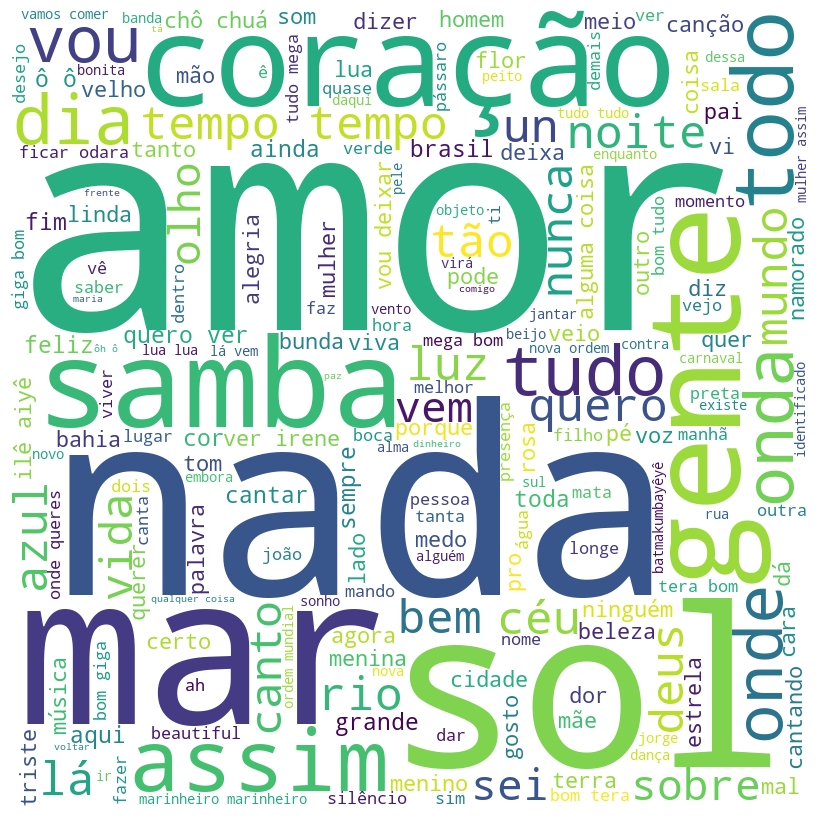

In [27]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords_pt,
                min_font_size = 10).generate(all_lyrics)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [141]:
all_lyrics

'coração vagabundo   meu coração não se cansa de ter esperança de um dia ser tudo o que quer  meu coração de criança não é só a lembrança de um vulto feliz de mulher que passou por meus sonhos sem dizer adeus e fez dos olhos meus um chorar mais sem fim  meu coração vagabundo quer guardar o mundo em mim meu coração vagabundo quer guardar o mundo em mim onde eu nasci passa um rio  onde eu nasci passa um rio que passa no igual sem fim igual sem fim minha terra passava dentro de mim passava como se o tempo nada pudesse mudar passava como se o rio não desaguasse no mar o rio deságua no mar já tanta coisa aprendi mas o que é mais meu cantar é isso que eu canto aqui hoje eu sei que o mundo é grande e o mar de ondas se faz mas nasceu junto com o rio o canto que eu canto mais o rio só chega no mar depois de andar pelo chão o rio da minha terra deságua em meu coração avarandado  cada palmeira da estrada tem uma moça recostada uma é minha namorada e essa estrada vai dar no mar cada palma enluarad